In [314]:
import datetime

import pandas as pd

all_statistic = pd.read_csv("all.statistics.csv")
routing_statistic = pd.read_csv("routing.statistics.csv")
search_statistic = pd.read_csv("search.statistics.csv")

statistics = {
    "All": all_statistic,
    "Routing": routing_statistic,
    "Search": search_statistic
}

NUM_OF_INCOMING_ELEMENTS = 'number of incoming elements (reloaded + change-file)'
DURATION_FOR_SPECIFIC_FILTERING = 'duration for specific-preprocessing (in ms)'
NUM_OF_PUBLISHED_ELEMENTS = 'number of published elements'
DURATION_COMPLETE = 'duration for preprocessing (in ms)'
NUM_OF_RELOADED_NODES = 'number of reloaded nodes'

In [315]:
# Number of changesets received
def num_of_rows(statistic: pd.DataFrame):
    return len(statistic)

In [316]:
from typing import Callable


def analysis(statistic: pd.DataFrame, col: str, index_func: str = None):
    index_func = getattr(statistic[col], index_func)
    index = index_func()
    row = statistic.iloc[index]
    value = row[col]
    return value, row

In [317]:
# Maximum number of elements found in a changeset (with reloaded)
def get_max_num_of_elements(statistic: pd.DataFrame):
    return analysis(statistic, NUM_OF_INCOMING_ELEMENTS, 'idxmax')

In [318]:
# Minimal number of elements found in a chageset
def get_min_num_of_elements(statistic: pd.DataFrame):
    return analysis(statistic, NUM_OF_INCOMING_ELEMENTS, 'idxmin')

In [319]:
# The mean num elements in a changeset
def get_mean_num_of_elements(statistic: pd.DataFrame):
    return statistic[NUM_OF_INCOMING_ELEMENTS].mean()

In [320]:
# The median num elements in a changeset
def get_median_num_of_elements(statistic: pd.DataFrame):
    return statistic[NUM_OF_INCOMING_ELEMENTS].median()

In [321]:
# Maximum duration for subject specific filtering
def get_maximum_duration_specific_filtering(statistic: pd.DataFrame):
    return analysis(statistic, DURATION_FOR_SPECIFIC_FILTERING, 'idxmax')

In [322]:
# Minimum duration for subject specific filtering
def get_minimum_duration_specific_filtering(statistic: pd.DataFrame):
    return analysis(statistic, DURATION_FOR_SPECIFIC_FILTERING, 'idxmin')

In [323]:
# Mean duration for subject specific filtering
def get_mean_duration_specific_filtering(statistic: pd.DataFrame):
    return statistic[DURATION_FOR_SPECIFIC_FILTERING].mean()

In [324]:
def get_median_duration_specific_filtering(statistic: pd.DataFrame):
    return statistic[DURATION_FOR_SPECIFIC_FILTERING].median()

In [325]:
def get_maximum_duration_filtering(statistic: pd.DataFrame):
    return analysis(statistic, DURATION_COMPLETE, 'idxmax')

In [326]:
def get_minimum_duration_filtering(statistic: pd.DataFrame):
    return analysis(statistic, DURATION_COMPLETE, 'idxmin')

In [327]:
def get_mean_duration_filtering(statistic: pd.DataFrame):
    return statistic[DURATION_COMPLETE].mean()

In [328]:
# Maximum difference between received and published elements. Maximum amount of discarded elements by each subject.
def get_max_diff_received_published_elements(statistic: pd.DataFrame):
    index = (statistic[NUM_OF_INCOMING_ELEMENTS] - statistic[NUM_OF_PUBLISHED_ELEMENTS]).idxmax()
    row = statistic.iloc[index]
    value = row[NUM_OF_INCOMING_ELEMENTS] - row[NUM_OF_PUBLISHED_ELEMENTS]
    return value, row

In [329]:
# Minimum difference between received and published elements. Minimum amount of discarded elements by each subject.
def get_min_diff_received_published_elements(statistic: pd.DataFrame):
    index = (statistic[NUM_OF_INCOMING_ELEMENTS] - statistic[NUM_OF_PUBLISHED_ELEMENTS]).idxmin()
    row = statistic.iloc[index]
    value = row[NUM_OF_INCOMING_ELEMENTS] - row[NUM_OF_PUBLISHED_ELEMENTS]
    return value, row

In [330]:
# Mean difference between received and published elements. Mean amount of discarded elements by each subject
def get_mean_diff_received_published_elements(statistic: pd.DataFrame):
    value = (statistic[NUM_OF_INCOMING_ELEMENTS] - statistic[NUM_OF_PUBLISHED_ELEMENTS]).mean()
    return value

In [331]:
def get_percentage_mean_diff(statistic: pd.DataFrame):
    value = get_mean_diff_received_published_elements(statistic) / get_mean_num_of_elements(statistic)
    return value

In [332]:
def run_analysis(analysis: Callable, analysis_name: str):
    print(analysis_name + ":")
    for name, statistic in statistics.items():
        value = analysis(statistic)
        if type(value) is tuple:
            print(name + ": " + str(value[0]))
            for val in value[1:]:
                print(val)
            print("-------------")
        else:
            print((name + ':').ljust(20), value)

In [333]:
run_analysis(num_of_rows, "Num of rows")

Num of rows:
All:                 9951
Routing:             9951
Search:              9951


In [334]:
run_analysis(get_max_num_of_elements, "Maximum elements")

Maximum elements:
All: 209676
ID                                                      2022-04-06T23:35:30Z
number of incoming elements (reloaded + change-file)                  209676
number of reloaded nodes                                              153283
duration for preprocessing (in ms)                                     31102
number of published elements                                          209676
duration for specific-preprocessing (in ms)                             1736
Name: 1762, dtype: object
-------------
Routing: 209676
ID                                                      2022-04-06T23:35:29Z
number of incoming elements (reloaded + change-file)                  209676
number of reloaded nodes                                              153283
duration for preprocessing (in ms)                                     29408
number of published elements                                            1929
duration for specific-preprocessing (in ms)                        

In [335]:
run_analysis(get_min_num_of_elements, "Minimum elements")

Minimum elements:
All: 21
ID                                                      2022-04-10T00:44:19Z
number of incoming elements (reloaded + change-file)                      21
number of reloaded nodes                                                  18
duration for preprocessing (in ms)                                      2280
number of published elements                                              21
duration for specific-preprocessing (in ms)                                2
Name: 6092, dtype: object
-------------
Routing: 21
ID                                                      2022-04-10T00:44:19Z
number of incoming elements (reloaded + change-file)                      21
number of reloaded nodes                                                  18
duration for preprocessing (in ms)                                      2280
number of published elements                                               5
duration for specific-preprocessing (in ms)                                

In [336]:
run_analysis(get_mean_num_of_elements, "Mean elements per changeset")

Mean elements per changeset:
All:                 5002.555622550497
Routing:             5002.555622550497
Search:              5002.555622550497


In [337]:
run_analysis(get_median_num_of_elements, "Median elements per changeset")

Median elements per changeset:
All:                 4224.0
Routing:             4224.0
Search:              4224.0


In [338]:
run_analysis(get_maximum_duration_specific_filtering, "Maximum duration for specific filtering")

Maximum duration for specific filtering:
All: 12627
ID                                                      2022-04-12T09:21:05Z
number of incoming elements (reloaded + change-file)                    7736
number of reloaded nodes                                                4300
duration for preprocessing (in ms)                                     15794
number of published elements                                            7736
duration for specific-preprocessing (in ms)                            12627
Name: 9444, dtype: object
-------------
Routing: 6626
ID                                                      2022-04-10T08:39:30Z
number of incoming elements (reloaded + change-file)                    4505
number of reloaded nodes                                                3229
duration for preprocessing (in ms)                                      9273
number of published elements                                            1915
duration for specific-preprocessing (in ms)    

In [339]:
run_analysis(get_minimum_duration_specific_filtering, "Minimum duration for specific filtering")

Minimum duration for specific filtering:
All: 1
ID                                                      2022-04-09T03:48:45Z
number of incoming elements (reloaded + change-file)                      29
number of reloaded nodes                                                  25
duration for preprocessing (in ms)                                      2036
number of published elements                                              29
duration for specific-preprocessing (in ms)                                1
Name: 4854, dtype: object
-------------
Routing: 0
ID                                                      2022-04-09T01:29:37Z
number of incoming elements (reloaded + change-file)                    1019
number of reloaded nodes                                                 448
duration for preprocessing (in ms)                                       784
number of published elements                                              14
duration for specific-preprocessing (in ms)           

In [340]:
run_analysis(get_mean_duration_specific_filtering, "Mean duration for specific filtering")

Mean duration for specific filtering:
All:                 68.7165109034268
Routing:             31.81800824037785
Search:              19.892774595518038


In [341]:
run_analysis(get_median_duration_specific_filtering, "Median duration for specific filtering")

Median duration for specific filtering:
All:                 57.0
Routing:             25.0
Search:              1.0


In [342]:
run_analysis(get_max_diff_received_published_elements, "Max difference between received and published")

Max difference between received and published:
All: 0
ID                                                      2022-04-05T17:50:44Z
number of incoming elements (reloaded + change-file)                    2700
number of reloaded nodes                                                 992
duration for preprocessing (in ms)                                      3250
number of published elements                                            2700
duration for specific-preprocessing (in ms)                               89
Name: 0, dtype: object
-------------
Routing: 207747
ID                                                      2022-04-06T23:35:29Z
number of incoming elements (reloaded + change-file)                  209676
number of reloaded nodes                                              153283
duration for preprocessing (in ms)                                     29408
number of published elements                                            1929
duration for specific-preprocessing (in ms)   

In [343]:
run_analysis(get_min_diff_received_published_elements, "Min difference between received and published")

Min difference between received and published:
All: 0
ID                                                      2022-04-05T17:50:44Z
number of incoming elements (reloaded + change-file)                    2700
number of reloaded nodes                                                 992
duration for preprocessing (in ms)                                      3250
number of published elements                                            2700
duration for specific-preprocessing (in ms)                               89
Name: 0, dtype: object
-------------
Routing: 0
ID                                                      2022-04-09T03:48:45Z
number of incoming elements (reloaded + change-file)                      29
number of reloaded nodes                                                  25
duration for preprocessing (in ms)                                      2041
number of published elements                                              29
duration for specific-preprocessing (in ms)        

In [344]:
run_analysis(get_mean_diff_received_published_elements, "Mean difference between received and published")

Mean difference between received and published:
All:                 0.0
Routing:             3395.9457340970757
Search:              4924.220480353733


In [345]:
run_analysis(get_maximum_duration_filtering, "Maximum duration filtering")

Maximum duration filtering:
All: 43359
ID                                                      2022-04-06T09:49:45Z
number of incoming elements (reloaded + change-file)                    6099
number of reloaded nodes                                                3046
duration for preprocessing (in ms)                                     43359
number of published elements                                            6099
duration for specific-preprocessing (in ms)                               63
Name: 947, dtype: object
-------------
Routing: 43320
ID                                                      2022-04-06T09:49:45Z
number of incoming elements (reloaded + change-file)                    6099
number of reloaded nodes                                                3046
duration for preprocessing (in ms)                                     43320
number of published elements                                            1559
duration for specific-preprocessing (in ms)                 

In [346]:
run_analysis(get_minimum_duration_filtering, "Minimum duration filtering")

Minimum duration filtering:
All: 43
ID                                                      2022-04-06T01:57:14Z
number of incoming elements (reloaded + change-file)                      56
number of reloaded nodes                                                   0
duration for preprocessing (in ms)                                        43
number of published elements                                              56
duration for specific-preprocessing (in ms)                                4
Name: 481, dtype: object
-------------
Routing: 41
ID                                                      2022-04-06T01:57:14Z
number of incoming elements (reloaded + change-file)                      56
number of reloaded nodes                                                   0
duration for preprocessing (in ms)                                        41
number of published elements                                              10
duration for specific-preprocessing (in ms)                       

In [347]:
run_analysis(get_mean_duration_filtering, "Mean duration filtering")

Mean duration filtering:
All:                 3903.2198773992563
Routing:             3866.064214651794
Search:              3854.091347603256


In [348]:
sum_incoming = statistics["All"][NUM_OF_INCOMING_ELEMENTS].sum()
print(sum_incoming)

49780431


In [349]:
sum_routing_published = statistics["Routing"][NUM_OF_PUBLISHED_ELEMENTS].sum()
print(sum_routing_published)

15987375


In [350]:
percentage_routing = sum_routing_published / sum_incoming
print(1 - percentage_routing)

0.6788421739458221


In [351]:
sum_search = statistics["Search"][NUM_OF_PUBLISHED_ELEMENTS].sum()
print(sum_search)

779513


In [352]:
percentage_search = sum_search / sum_incoming
print(1 - percentage_search)

0.9843409752719899


In [353]:
run_analysis(get_percentage_mean_diff, "Mean percentage diff")

Mean percentage diff:
All:                 0.0
Routing:             0.6788421739458222
Search:              0.98434097527199


In [354]:
statistics["Search"].sort_values([DURATION_COMPLETE], ascending=False)

,ID,number of incoming elements (reloaded + change-file),number of reloaded nodes,duration for preprocessing (in ms),number of published elements,duration for specific-preprocessing (in ms)
5568,2022-04-09T15:54:40Z,133726,113485,123035,37252,107862
947,2022-04-06T09:49:45Z,6099,3046,43293,16,0
1762,2022-04-06T23:35:29Z,209676,153283,29431,2606,65
4073,2022-04-08T14:37:35Z,25872,4689,25302,106,4
1216,2022-04-06T14:22:11Z,5889,2707,25148,33,2
...,...,...,...,...,...,...
6408,2022-04-10T06:05:19Z,500,0,55,0,0
4716,2022-04-09T01:28:26Z,565,0,51,0,0
7520,2022-04-11T00:51:27Z,255,0,47,7,2
7500,2022-04-11T00:31:16Z,417,0,44,1,0


In [355]:
statistics["Routing"].sort_values([DURATION_COMPLETE], ascending=False)

,ID,number of incoming elements (reloaded + change-file),number of reloaded nodes,duration for preprocessing (in ms),number of published elements,duration for specific-preprocessing (in ms)
947,2022-04-06T09:49:45Z,6099,3046,43320,1559,27
1762,2022-04-06T23:35:29Z,209676,153283,29408,1929,42
4073,2022-04-08T14:37:35Z,25872,4689,25350,5337,52
1216,2022-04-06T14:22:11Z,5889,2707,25176,1615,28
1432,2022-04-06T18:00:57Z,9724,4770,22180,2821,62
...,...,...,...,...,...,...
6408,2022-04-10T06:05:19Z,500,0,57,28,2
4716,2022-04-09T01:28:26Z,565,0,55,1,3
7500,2022-04-11T00:31:16Z,417,0,52,14,1
7520,2022-04-11T00:51:27Z,255,0,47,8,2


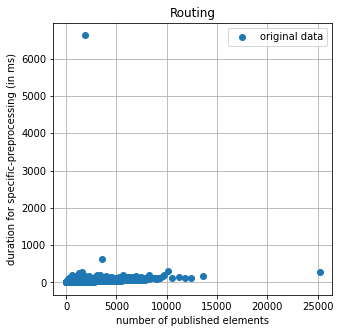

In [356]:
FILTER_ATTRIBUTE = DURATION_FOR_SPECIFIC_FILTERING
STATISTIC = "Routing"
search_filtered_dataframe = (
    statistics[STATISTIC][statistics[STATISTIC][FILTER_ATTRIBUTE] < 10000].sort_values([NUM_OF_PUBLISHED_ELEMENTS]))

import matplotlib.pyplot as plt
from scipy.stats import linregress

x = search_filtered_dataframe[NUM_OF_PUBLISHED_ELEMENTS]
y = search_filtered_dataframe[FILTER_ATTRIBUTE]

plt.figure(figsize=(5, 5))
plt.plot(x, y, 'o', label="original data")
plt.title(STATISTIC)
# plt.axhline(y=60000, color='r')
plt.xlabel(NUM_OF_PUBLISHED_ELEMENTS)
plt.ylabel(FILTER_ATTRIBUTE)
plt.legend()
plt.grid()
plt.show()

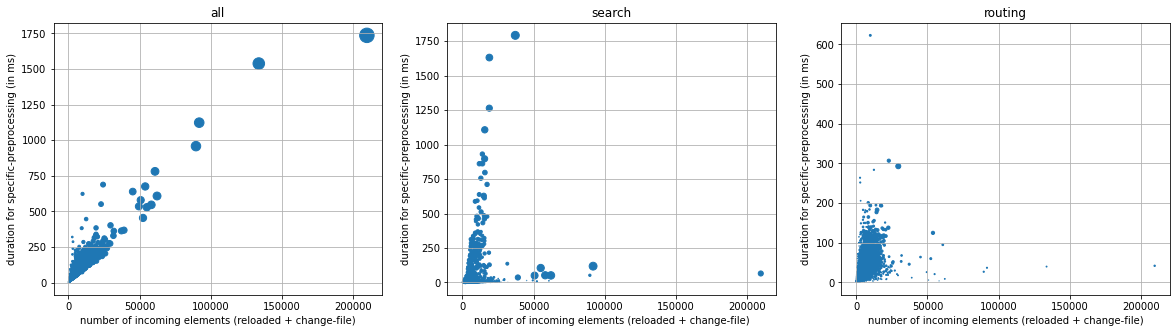

In [357]:
FILTER_ATTRIBUTE = DURATION_FOR_SPECIFIC_FILTERING
X_AXIS_VALUE = NUM_OF_INCOMING_ELEMENTS
search_dataframe = statistics["Search"]
search_filtered_dataframe = search_dataframe[search_dataframe[FILTER_ATTRIBUTE] < 3000].sort_values([X_AXIS_VALUE])
search_x = search_filtered_dataframe[X_AXIS_VALUE]
search_y = search_filtered_dataframe[FILTER_ATTRIBUTE]

routing_dataframe = statistics["Routing"]
routing_filtered_dataframe = routing_dataframe[routing_dataframe[FILTER_ATTRIBUTE] < 6000].sort_values([X_AXIS_VALUE])
routing_x = routing_filtered_dataframe[X_AXIS_VALUE]
routing_y = routing_filtered_dataframe[FILTER_ATTRIBUTE]

all_dataframe = statistics["All"]
all_filtered_dataframe = all_dataframe[all_dataframe[FILTER_ATTRIBUTE] < 6000].sort_values([X_AXIS_VALUE])
all_x = all_filtered_dataframe[X_AXIS_VALUE]
all_y = all_filtered_dataframe[FILTER_ATTRIBUTE]

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].scatter(all_x, all_y, s=all_filtered_dataframe[NUM_OF_PUBLISHED_ELEMENTS]/1e3)
axs[0].set_title("all")
axs[0].grid()
# axs[1].scatter(search_x, search_y, s=search_filtered_dataframe[NUM_OF_INCOMING_ELEMENTS]/300)
axs[1].scatter(search_x, search_y, s=search_filtered_dataframe[NUM_OF_PUBLISHED_ELEMENTS]/1e2)
axs[1].set_title("search")
axs[1].grid()
axs[2].grid()
axs[2].scatter(routing_x, routing_y, s=routing_filtered_dataframe[NUM_OF_PUBLISHED_ELEMENTS]/1e3)
axs[2].set_title("routing")

for ax in axs.flat:
    ax.set(xlabel=X_AXIS_VALUE, ylabel=FILTER_ATTRIBUTE)

# fig.savefig('./subject_filtering_comparison.pdf')

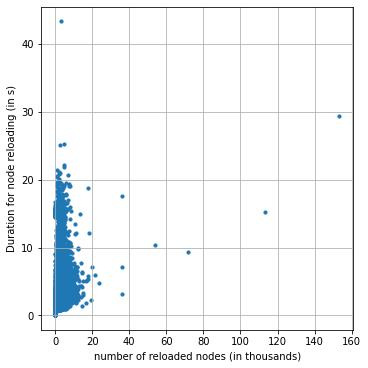

In [358]:
FILTER_ATTRIBUTE = DURATION_COMPLETE
X_AXIS_VALUE = NUM_OF_RELOADED_NODES

search_reloaded_dataframe = statistics["Search"].sort_values(X_AXIS_VALUE)
search_x = search_reloaded_dataframe[X_AXIS_VALUE]
search_y = search_reloaded_dataframe[FILTER_ATTRIBUTE] - search_reloaded_dataframe[DURATION_FOR_SPECIFIC_FILTERING]

routing_reloaded_dataframe = statistics["Routing"].sort_values(X_AXIS_VALUE)
routing_x = routing_reloaded_dataframe[X_AXIS_VALUE]
routing_y = routing_reloaded_dataframe[FILTER_ATTRIBUTE] - routing_reloaded_dataframe[DURATION_FOR_SPECIFIC_FILTERING]

all_reloaded_dataframe = statistics["All"].sort_values(X_AXIS_VALUE)
all_x = all_reloaded_dataframe[X_AXIS_VALUE]
all_y = all_reloaded_dataframe[FILTER_ATTRIBUTE] - all_reloaded_dataframe[DURATION_FOR_SPECIFIC_FILTERING]

fig, axs = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)

axs.scatter(all_x / 1e3, all_y / 1e3, s=10)
plt.xlabel(X_AXIS_VALUE + " (in thousands)")
plt.ylabel("Duration for node reloading (in s)")
axs.grid()
# axs[1].scatter(search_x, search_y, s=7)
# axs[1].set_title("search")
# axs[1].grid()
# axs[2].scatter(routing_x, routing_y, s=7)
# axs[2].set_title("routing")
# axs[2].grid()

# for ax in axs.flat:
#     ax.set(xlabel=X_AXIS_VALUE, ylabel=FILTER_ATTRIBUTE)
# fig.savefig('reloaded_nodes_statistic.pdf')

In [359]:
search_y.mean()

3834.198573007738

In [360]:
all_dataframe

,ID,number of incoming elements (reloaded + change-file),number of reloaded nodes,duration for preprocessing (in ms),number of published elements,duration for specific-preprocessing (in ms)
0,2022-04-05T17:50:44Z,2700,992,3250,2700,89
1,2022-04-05T17:50:51Z,3644,1403,7042,3644,51
2,2022-04-05T17:51:56Z,3308,1727,4564,3308,50
3,2022-04-05T17:53:02Z,24304,4327,6269,24304,688
4,2022-04-05T17:54:07Z,6292,5203,14599,6292,64
...,...,...,...,...,...,...
9946,2022-04-12T17:50:20Z,1470,1011,2327,1470,20
9947,2022-04-12T17:51:23Z,7298,4221,2714,7298,82
9948,2022-04-12T17:52:25Z,4457,1819,2083,4457,63
9949,2022-04-12T17:53:19Z,2974,1460,3481,2974,54


No handles with labels found to put in legend.


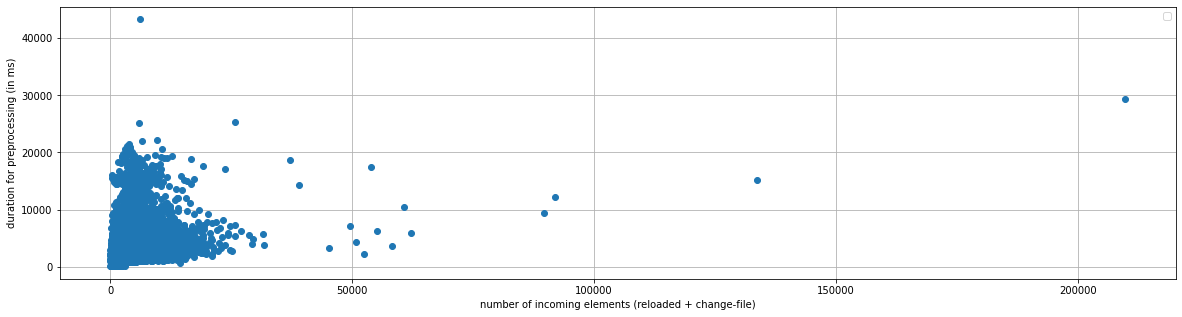

In [361]:
FILTER_ATTRIBUTE = DURATION_COMPLETE
X_AXIS_VALUE = NUM_OF_INCOMING_ELEMENTS
# search_dataframe = statistics["Search"]
# search_filtered_dataframe = search_dataframe[search_dataframe[FILTER_ATTRIBUTE] > -1].sort_values([X_AXIS_VALUE])
# search_x = search_filtered_dataframe[X_AXIS_VALUE]
# search_y = search_filtered_dataframe[FILTER_ATTRIBUTE]-search_filtered_dataframe[DURATION_FOR_SPECIFIC_FILTERING]

# routing_dataframe = statistics["Routing"]
# routing_filtered_dataframe = routing_dataframe[routing_dataframe[FILTER_ATTRIBUTE] > -1].sort_values([X_AXIS_VALUE])
# routing_x = routing_filtered_dataframe[X_AXIS_VALUE]
# routing_y = routing_filtered_dataframe[FILTER_ATTRIBUTE]-routing_filtered_dataframe[DURATION_FOR_SPECIFIC_FILTERING]
#
all_dataframe = statistics["All"]
all_filtered_dataframe = all_dataframe[all_dataframe[FILTER_ATTRIBUTE] > -1].sort_values([X_AXIS_VALUE])
all_x = all_filtered_dataframe[X_AXIS_VALUE]
all_y = all_filtered_dataframe[FILTER_ATTRIBUTE] - all_filtered_dataframe[DURATION_FOR_SPECIFIC_FILTERING]
#
# fig, axs = plt.subplots(1, 3, figsize=(20, 5), constrained_layout=True)
#
# axs[0].plot(all_x, all_y, 'o')
# axs[0].set_title("all")
# axs[0].grid()
# axs[1].plot(search_x, search_y, 'o')
# axs[1].set_title("search")
# axs[1].grid()
# axs[2].plot(routing_x, routing_y, 'o')
# axs[2].set_title("routing")
# axs[2].grid()
#
# for ax in axs.flat:
#     ax.set(xlabel=X_AXIS_VALUE, ylabel=FILTER_ATTRIBUTE)
plt.figure(figsize=(20, 5))
plt.plot(all_x, all_y, 'o')
# plt.title("Duration for downloading changeset and reloading all missing nodes")
# plt.axhline(y=60000, color='r')
plt.xlabel(X_AXIS_VALUE)
plt.ylabel(FILTER_ATTRIBUTE)
plt.legend()
plt.grid()
plt.show()


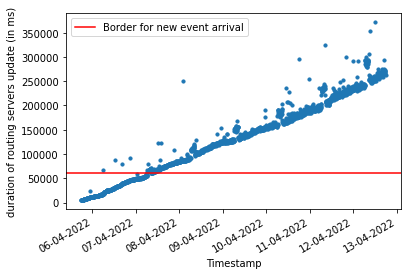

In [362]:
import datetime
from matplotlib import dates


def date_parse(date):
    return datetime.datetime.strptime(date, "%Y-%m-%dT%H:%M:%SZ")


ROUTING_SERVER_DURATION_COLUMN = 'duration of routing servers update (in ms)'
routing_service_dataframe = pd.read_csv("routing-server.statistics.csv", parse_dates=True, date_parser=date_parse,
                                        header=1, index_col=['DateTime'],
                                        names=['DateTime', ROUTING_SERVER_DURATION_COLUMN])

x_routing = routing_service_dataframe.index.get_level_values("DateTime")
y_routing = routing_service_dataframe[ROUTING_SERVER_DURATION_COLUMN]
fig, ax = plt.subplots()
ax.scatter(x_routing, y_routing, s=10)
# ax.xaxis.set_major_locator()
ax.xaxis.set_major_formatter(dates.DateFormatter('%d-%m-%Y'))
plt.gcf().autofmt_xdate()
plt.xlabel("Timestamp")
plt.axhline(y=60000, color='r').set_label('Border for new event arrival')
plt.ylabel(ROUTING_SERVER_DURATION_COLUMN)
plt.legend()
plt.show()

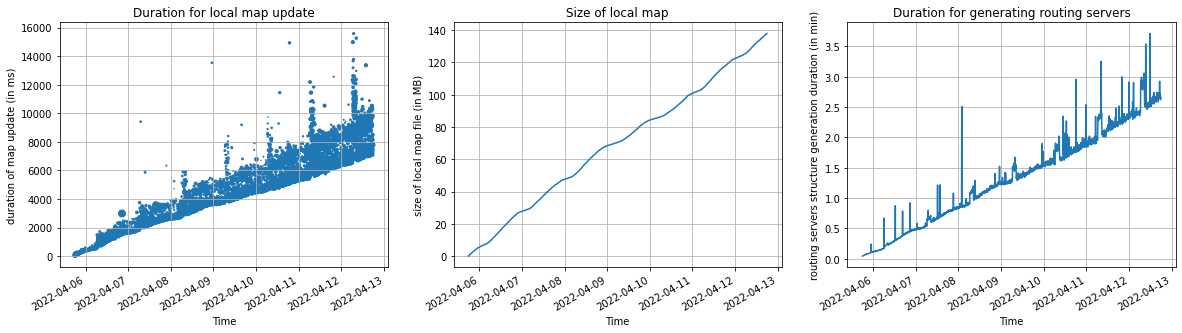

In [363]:
MAP_UPDATE_DURATION_COLUMN = 'duration of map update (in ms)'
MAP_SIZE_COLUMN = 'size of map (in bytes)'
MAP_GZIP_COLUMN = 'duration of writing zip file to disk (in ms)'
MAP_EVENT_SIZE = 'size of incoming event (in bytes)'
map_service_dataframe = pd.read_csv("map.statistics.csv", parse_dates=True, date_parser=date_parse, header=1,
                                    index_col=['DateTime'],
                                    names=['DateTime', MAP_UPDATE_DURATION_COLUMN, MAP_SIZE_COLUMN, MAP_GZIP_COLUMN,
                                           MAP_EVENT_SIZE])
map_service_dataframe_filtered = map_service_dataframe[map_service_dataframe[MAP_UPDATE_DURATION_COLUMN] < 16000]

x = map_service_dataframe.index.get_level_values("DateTime")
y = map_service_dataframe[MAP_UPDATE_DURATION_COLUMN]
x_event_size = map_service_dataframe[MAP_EVENT_SIZE]
y_filtered = map_service_dataframe_filtered[MAP_UPDATE_DURATION_COLUMN]
x_filtered = map_service_dataframe_filtered.index.get_level_values("DateTime")

y_map_size = map_service_dataframe_filtered[MAP_SIZE_COLUMN]

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].scatter(x_filtered, y_filtered, s=map_service_dataframe_filtered[MAP_EVENT_SIZE] / 1e4)
axs[0].grid()
axs[0].set_title("Duration for local map update")
axs[0].set(ylabel=MAP_UPDATE_DURATION_COLUMN)
axs[1].plot(x, map_service_dataframe[MAP_SIZE_COLUMN] / 1e6)
axs[1].grid()
axs[1].set_title("Size of local map")
axs[1].set(ylabel='size of local map file (in MB)')
axs[2].plot(x_routing, y_routing / 1e5)
axs[2].grid()
axs[2].set_title("Duration for generating routing servers")
axs[2].set(ylabel='routing servers structure generation duration (in min)')
plt.gcf().autofmt_xdate()
for ax in axs.flat:
    ax.set(xlabel='Time')
# plt.axhline(y=60000, color='r').set_label('Border for new event arrival')
# plt.ylabel(MAP_UPDATE_DURATION_COLUMN)
# plt.legend()
plt.show()
fig.savefig('routing_statistic.pdf')

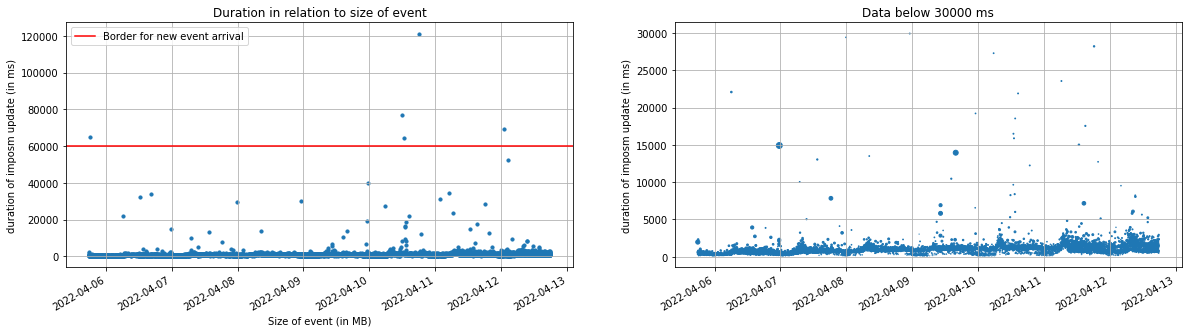

In [364]:
RENDERER_UPDATE_DURATION_COLUMN = 'duration of imposm update (in ms)'
RENDERER_GZIP_COLUMN = 'duration of writing zip file to disk (in ms)'
RENDERER_EVENT_SIZE = 'size of incoming event (in bytes)'
renderer_service_dataframe = pd.read_csv("renderer.statistics.csv", parse_dates=True, date_parser=date_parse, header=1,
                                         index_col=['DateTime'],
                                         names=['DateTime', RENDERER_UPDATE_DURATION_COLUMN, RENDERER_GZIP_COLUMN,
                                                RENDERER_EVENT_SIZE])
renderer_service_dataframe_filtered = renderer_service_dataframe[
    renderer_service_dataframe[RENDERER_UPDATE_DURATION_COLUMN] < 30000]
x = renderer_service_dataframe.index.get_level_values("DateTime")
y = renderer_service_dataframe[RENDERER_UPDATE_DURATION_COLUMN]
x_filtered = renderer_service_dataframe_filtered.index.get_level_values("DateTime")
y_filtered = renderer_service_dataframe_filtered[RENDERER_UPDATE_DURATION_COLUMN]
x_event_size = renderer_service_dataframe[RENDERER_EVENT_SIZE]

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].scatter(x, y, s=10)
axs[0].plot()
axs[0].axhline(y=60000, color='r').set_label('Border for new event arrival')
axs[0].set_title("Duration in relation to size of event")
axs[0].legend()
axs[0].grid()
axs[0].set(xlabel='Size of event (in MB)')
axs[1].scatter(x_filtered, y_filtered, s=renderer_service_dataframe_filtered[RENDERER_EVENT_SIZE] / 1e5)
axs[1].set_title("Data below 30000 ms")
axs[1].grid()
for ax in axs.flat:
    ax.set(ylabel=RENDERER_UPDATE_DURATION_COLUMN)

plt.gcf().autofmt_xdate()
plt.show()
fig.savefig('renderer.pdf')

In [365]:
def general_stats(dataframe: pd.DataFrame, duration_column: str):
    print("Mean: ", dataframe[duration_column].mean())
    print("Max: ", dataframe[duration_column].max())
    print("Min: ", dataframe[duration_column].min())
    print("Median: ", dataframe[duration_column].median())
    print("Greater 60s", len(dataframe[dataframe[duration_column] > 60000]))
    print("------------------")

In [366]:
general_stats(renderer_service_dataframe, RENDERER_UPDATE_DURATION_COLUMN)
general_stats(renderer_service_dataframe_filtered, RENDERER_UPDATE_DURATION_COLUMN)

Mean:  1044.0286432160804
Max:  121269
Min:  90
Median:  887.0
Greater 60s 5
------------------
Mean:  982.6630445718886
Max:  29926
Min:  90
Median:  887.0
Greater 60s 0
------------------


In [367]:
general_stats(map_service_dataframe, MAP_UPDATE_DURATION_COLUMN)

Mean:  4277.0944723618095
Max:  73294
Min:  13
Median:  4102.0
Greater 60s 1
------------------


Mean:  duration of search update (in ms)    210.402473
dtype: float64
Max:  duration of search update (in ms)    131597.916
dtype: float64
Min:  duration of search update (in ms)    0.266
dtype: float64
Median:  duration of search update (in ms)    35.4585
dtype: float64
5


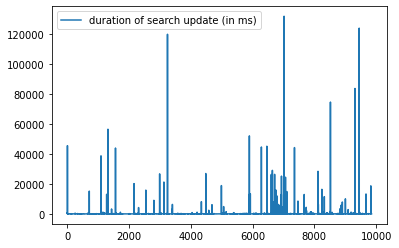

In [368]:
search_service_dataframe = pd.read_csv('search_service.data.csv')
search_service_dataframe[search_service_dataframe['duration of search update (in ms)'] < 1000]
print("Mean: ", search_service_dataframe.mean())
print("Max: ", search_service_dataframe.max())
print("Min: ", search_service_dataframe.min())
print("Median: ", search_service_dataframe.median())
search_service_dataframe.plot()
print(len(search_service_dataframe[search_service_dataframe['duration of search update (in ms)'] > 60000]))

In [369]:
routing_dataframe[NUM_OF_PUBLISHED_ELEMENTS].mean()

1606.6098884534217

In [370]:
search_dataframe.iloc[search_dataframe[NUM_OF_PUBLISHED_ELEMENTS].idxmax()]

ID                                                      2022-04-09T15:54:40Z
number of incoming elements (reloaded + change-file)                  133726
number of reloaded nodes                                              113485
duration for preprocessing (in ms)                                    123035
number of published elements                                           37252
duration for specific-preprocessing (in ms)                           107862
Name: 5568, dtype: object

In [371]:
search_dataframe

,ID,number of incoming elements (reloaded + change-file),number of reloaded nodes,duration for preprocessing (in ms),number of published elements,duration for specific-preprocessing (in ms)
0,2022-04-05T17:50:44Z,2700,992,3171,26,9
1,2022-04-05T17:50:51Z,3644,1403,6999,111,17
2,2022-04-05T17:51:56Z,3308,1727,4522,117,9
3,2022-04-05T17:53:02Z,24304,4327,5595,164,15
4,2022-04-05T17:54:07Z,6292,5203,14544,257,9
...,...,...,...,...,...,...
9946,2022-04-12T17:50:20Z,1470,1011,2307,22,0
9947,2022-04-12T17:51:23Z,7298,4221,2647,112,17
9948,2022-04-12T17:52:25Z,4457,1819,2021,27,0
9949,2022-04-12T17:53:19Z,2974,1460,3429,49,2
